<a href="https://colab.research.google.com/github/kkyung0131/Euron-6th-Project/blob/%EC%A1%B0%EC%8A%B9%EC%97%B0/%EB%B2%88%EC%97%AD_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')


file_path =  "/content/gdrive/My Drive/EuronData/"

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
# 나눔폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,690 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123598 files and dire

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
!pip install konlpy

In [ ]:
!pip install emoji

In [ ]:
#기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#사이킷런
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

#konlpy
from konlpy.tag import Okt, Komoran, Hannanum

#tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Conv1D, GlobalMaxPooling1D, Dropout, Embedding
from tensorflow.keras.callbacks import EarlyStopping

#tqdm
from tqdm import tqdm

#벡터화
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [ ]:
df1 = pd.read_csv(file_path + "final_result.csv")
df2 = pd.read_csv(file_path + "new_data.csv")

# Split 후 DA

In [ ]:
df1 = df1.drop(['id','title','score_val','descript'], axis=1)

In [ ]:
df1 = df1.dropna()

In [ ]:
df1['keyword2'].unique()

array(['친절해요', '고기 질이 좋아요', '인테리어가 멋져요', '양이 많아요', '가성비가 좋아요', '재료가 신선해요',
       '특별한 메뉴가 있어요', '혼밥하기 좋아요', '음료가 맛있어요', '음악이 좋아요', '술이 다양해요',
       '커피가 맛있어요', '디저트가 맛있어요', '음식이 맛있어요', '단체모임 하기 좋아요', '기본 안주가 좋아요',
       '뷰가 좋아요', '매장이 넓어요', '혼술하기 좋아요', '매장이 청결해요', '집중하기 좋아요',
       '주차하기 편해요', '대화하기 좋아요', '차가 맛있어요'], dtype=object)

In [ ]:
le = LabelEncoder()
df1['keyword2'] = le.fit_transform(df1['keyword2'])

In [ ]:
le.transform(['친절해요'])

array([19])

In [ ]:
le.transform(["재료가 신선해요", "가성비가 좋아요"])

array([15,  0])

In [ ]:
le.transform(["특별한 메뉴가 있어요", "인테리어가 멋져요", "양이 많아요", "혼밥하기 좋아요"])

array([21, 14, 10, 22])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1['reviews'], df1['keyword2'], test_size = 0.2, random_state = 0)

In [ ]:
Train = pd.concat([X_train, y_train], axis=1)

In [ ]:
Train

,reviews,keyword2
242,이문수 가브리엘 신부님 존경합니다. 유퀴즈 에서 뵙고 꼭 가보고 싶었는데 드디어 이...,0
519,너무좋았던시간이였어요~ 너무친절하시고 맛있고 노래들으면서 힐링했습니다 또갈예정이예요...,12
315,원래는 서울에서 제일 유명한 수플레 맛집과 여기 맛이랑 비슷한데 지금은 달라졌어요 ...,21
140,학교 앞에 있어 자주 이용하는 곳이에요. 학생들이 많아서 그런지 가격이 합리적이고 ...,0
231,주문 즉시 조리가 시작되기 때문에 음식이 최종적으로 다오는데에는 시간이 조금 소요되...,21
...,...,...
9,"인도커리랑 난이랑 조합 최고에요,,, ㅠㅠ 적당히 매콤한 맛이어서 더 좋았어요 ㅠ ...",14
359,전부터 가보고 싶었는데 영화보고 가기 딱 좋아서 다녀왔어요. 골목 안에 있어서 찾기...,0
192,새로 나온 메뉴인 윙봉삼총사를 주문했고 간장/후라이드/마라 맛으로 선택했습니다. 윙...,0
642,김밥은 통통 도시락은 저렴 / 좋아요 / 혼밥하기 좋아요🙂☺️ / 맛있고 간편해요 ...,12


In [ ]:
df_eng =  Train[Train['keyword2']!=19]
print(df_eng.shape)

df_jap = df_eng[~df_eng['keyword2'].isin([15,  0])]
print(df_jap.shape)

df_chi = df_jap[~df_jap['keyword2'].isin([21, 14, 10, 22])]
print(df_chi.shape)

(401, 2)
(260, 2)
(100, 2)


In [ ]:
eng_rows = []

In [ ]:
for i, row in df_eng.iterrows():
  myrow = row.copy()
  translator = Translator()
  txt = myrow['reviews']
  res = translator.translate(txt, src='ko', dest='en')
  res2 = translator.translate(res.text, src='en', dest='ko')
  myrow['reviews'] = res2.text
  eng_rows.append(myrow)

In [ ]:
pd.DataFrame(eng_rows)

,reviews,keyword2
242,나는 아버지 가브리엘 리 (Gabriel Lee)를 존경합니다. U- 퀴즈에서 당신...,0
519,좋은 시간이었고 너무 친절하고 맛있고 듣는 동안 치유되었습니다. 맛있기 때문에 매운...,12
315,원래는 서울에서 가장 유명한 수플레 레스토랑과 비슷하지만 지금은 다릅니다. 그럼에도...,21
140,이곳은 학교 앞에서 자주 사용되는 곳입니다. 많은 학생들이 많기 때문에 가격이 합리...,0
231,요리가 시작된 직후 요리가 시작되기 때문에 다가 오기 위해서는 약간의 음식이 필요합...,21
...,...,...
608,돼지 고기 커틀릿을 생각했을 때 자주 방문했지만 새로운 메뉴 Donburi가 나왔기...,10
9,"그것은 인도 카레와 난과의 가장 좋은 조합입니다. 나는 버터 란 마늘이었고, 나는 ...",14
359,전에 가고 싶었지만 영화를 보러갔습니다. 골목에 있기 때문에 찾기가 어려울 수 있지...,0
192,나는 새로운 메뉴 인 Wingbongsam Musketeers를 주문하고 그것을 간...,0


In [ ]:
jap_rows = []

In [ ]:
for i, row in df_jap.iterrows():
  myrow = row.copy()
  translator = Translator()
  txt = myrow['reviews']
  res = translator.translate(txt, src='ko', dest='ja')
  res2 = translator.translate(res.text, src='ja', dest='ko')
  myrow['reviews'] = res2.text
  jap_rows.append(myrow)

In [ ]:
chi_rows = []

In [ ]:
for i, row in df_chi.iterrows():
  myrow = row.copy()
  translator = Translator()
  txt = myrow['reviews']
  res = translator.translate(txt, src='ko', dest='zh-cn')
  res2 = translator.translate(res.text, src='zh-cn', dest='ko')
  myrow['reviews'] = res2.text
  chi_rows.append(myrow)

In [ ]:
df_eng = pd.DataFrame(eng_rows)
df_jap = pd.DataFrame(jap_rows)
df_chi = pd.DataFrame(chi_rows)

In [ ]:
fin_df = pd.concat([Train, df_eng, df_jap, df_chi], ignore_index=True)

In [ ]:
fin_df

,reviews,keyword2
0,이문수 가브리엘 신부님 존경합니다. 유퀴즈 에서 뵙고 꼭 가보고 싶었는데 드디어 이...,0
1,너무좋았던시간이였어요~ 너무친절하시고 맛있고 노래들으면서 힐링했습니다 또갈예정이예요...,12
2,원래는 서울에서 제일 유명한 수플레 맛집과 여기 맛이랑 비슷한데 지금은 달라졌어요 ...,21
3,학교 앞에 있어 자주 이용하는 곳이에요. 학생들이 많아서 그런지 가격이 합리적이고 ...,0
4,주문 즉시 조리가 시작되기 때문에 음식이 최종적으로 다오는데에는 시간이 조금 소요되...,21
...,...,...
1292,"분위기는 매우 좋고 음악은 매우 좋습니다 /나는 좋은 음악, 기타, 피아노 및 보스...",13
1293,이탈리아 소시지 피자는 사냥꾼이 쿼리 한 대표 메뉴 중 하나입니다.Golden Pi...,9
1294,아이스크림 지역의 커피 공간 인 Tang Copper. 직원은 매우 친절하고 디저트...,20
1295,커피 외에도 많은 음료가 있습니다.수박 주스는 맛있습니다./ twosome iceb...,20


In [ ]:
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviews   1297 non-null   object
 1   keyword2  1297 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


In [ ]:
import emoji
import re

# 이모티콘 제거 함수
def remove_emoji(text):
    text = emoji.demojize(text)
    emoji_name_pattern = r':[a-zA-Z_]+:'
    return re.sub(emoji_name_pattern, '', text)

df_emoji = fin_df.copy()
df_emoji['reviews'] = df_emoji['reviews'].apply(remove_emoji)

print(fin_df['reviews'][1])  # 이모티콘 제거 전
print(df_emoji['reviews'][1])  # 이모티콘 제거 후

너무좋았던시간이였어요~ 너무친절하시고 맛있고 노래들으면서 힐링했습니다 또갈예정이예요~ / 직원분이 맛있고 음식이 친절해요🤭 또 땡초 바베큐 먹었어요! 맛있게 매워서 매운 거 좋아하시는 분들 꼭 드셔보세요!! 저는 처음 먹었을 때보다 덜 매워진 것 같아서 다시 더 매워졌으면 좋겠어요 ㅎ.ㅎ 나름 오랜만에 갔지만 여전히 분위기도 너무 좋고 행복한 시간이었습니다🧡 / 분위기도 너무 좋고 음악도 넘 좋아용! 하이볼도 맛있고 안주도 맛있네요!! 다음 번에 또 오고 싶어요 / 가라아게는 사진을 못 찍었지만.. 숯불바베큐나 가라아게 둘 다 정말 맛있었습니다! 매운 거 잘 드시는 분들은 땡초 한 번 꼭 드셔보세요 최고예요🫢 사장님과 직원분들 친절하셔서 너무 좋았습니다🥰 / 분위기 좋고 맛있어서 좋습니다 양은 좀 적다고 느낌ㅠ / 동기들과의 졸업 기념 회식 장소로 예약 후 이용했습니다:) 아 저흰 인원이 많아서(13명) 예약금 받으셨고, 미리 주문 접수해주셔서 도착과 함께 먹을 수 있도록 세팅해주셨습니다🥹  술 종류도 다양해서 술 못마시는 친구들은 피치하이볼 시켜서 맛있게 마셨네요!!  음식도 왕맛있었습니다. 특히 숯불바베큐!! 진짜 치밥하기 딱입니다ㅜㅜ 로제 떡볶이도 맛있있어요  13명으로 계속 주문하고,,치워주시고ㅜㅜ사장님과 직원분들이 매우 친절하셨습니다,,감사합니다  다음엔 소수 인원으로 뵙겠습니당:) / 분위기 깡패+피치하이볼 맛집,,체고에여,,!!❤️💚 / 바베큐가 정말 맛있어요! 저희 소울 푸드입니다 종종 먹으러 옵니다 / 음식도 너무 맛있고 분위기도 좋고 추천 곡도 틀어주세요 ㅠ 하이볼도 맛있어요 ㅠ 재방문의사 74839392020% 입니다!!! / 짐빔하이볼은 여기 따라올곳이 없답니다^^ 듣고 싶은 노래도 들을수 있고~~ 분위기 너무너무 좋아요~~
너무좋았던시간이였어요~ 너무친절하시고 맛있고 노래들으면서 힐링했습니다 또갈예정이예요~ / 직원분이 맛있고 음식이 친절해요 또 땡초 바베큐 먹었어요! 맛있게 매워서 매운 거 좋아하시는 분들 꼭 드셔보세요!! 저는 처음 

In [ ]:
def clean_review(review):
    # 한글과 공백만 빼고 제거
    review = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', review)

    # 'ㅋㅋㅋ', 'ㅎㅎㅎ', 'ㅠㅠ', 'ㅜㅜ' 같은 단어들 제거
    review = re.sub(r'ㅋ+','',review)
    review = re.sub(r'ㅎ+','',review)
    review = re.sub(r'ㅠ+','',review)
    review = re.sub(r'ㅜ+','',review)

    # 불필요한 공백 제거
    review = review.strip()
    review = re.sub(r'\s+', ' ', review)

    return review

fin_df['clean_reviews'] = df_emoji['reviews'].apply(clean_review)
fin_df['clean_reviews'][0]

'이문수 가브리엘 신부님 존경합니다 유퀴즈 에서 뵙고 꼭 가보고 싶었는데 드디어 이대점 방문 김치찌개가 원 라면사리 원 스팸사리 원 원에 공기밥도 무료에 콩나물 무침까지 맛을 떠나서 너무나 행복한 한끼식사였습니다 잘먹었습니다 정말 맛있고 가성비도 최고입니다 솔직히 가성비라는 말 쓰기도 죄송할 정도에요 가난한 대학생들의 지갑을 지켜주셔서 항상 감사합니당 몇년 전에 신부님 책 읽고 정동 꼭 가보고 싶었는데 학교 앞에도 있어서 드디어 방문해보았네요 김치찌개 맛있고 가격도 저렴해서 자주 방문하러 갈 것 같아요 안내해주시는 분들도 친절하셔서 추가 주문한 계란후라이도 맛있게 해먹었습니다 이화여대 앞에서 혼밥하기 좋은 공간입니다 김치찌개 천원인데 라면사리와 스팸 추가하면 천원에 부대찌개를 즐길 수 있습니다 밥과 반찬도 무한리필이라 정말 든든하게 한끼 먹을 수 있었습니다 혼밥하기 너무 좋은 공간입니다 몇년전 티비에서 청년들을 위해 신부님이 김치찌개를 천원에 판매 한다는걸 본적이 있었습니다 우연찮게 신촌 골목길을 거닐다가 발견해서 너무 신기해서 바로 입장해서 먹었어요 국내산 재료라 너무 맛있어서 행복하게 먹고 나왔습니다 우리 청년들을 위해 봉사하시는 모든분들 존경 합니다 고맙습니다 김치찌개에 스팸 추가해서 먹었어요 이게 천원이라는게 말이 안됩니다 맛있어요 고기 두부도 꽤 들어있구 졸이면서 먹으니까 더 맛있었어요 혼자 먹기에 양도 많았습니다 그리고 밥이랑 콩나물 자유롭게 가져다 먹을수있어서 좋아요 콩나물이 짭조름하고 아주 맛있어용 가성비가 정말 좋아요 지갑 사정 좋지 않을 때 가면 너무 좋습니다 존재 자체가 감사한 식당이랄까요 받아서 한 번 더 푹 끓여 먹으면 정말 맛있어요 두부사리 추가 추천드립니장 오늘 방문 했는데 맹물에다가 신맛 첨가한 찌개 먹었습니다 왠만하면 안 남기는데 반 남겼여요 청년문간 사업부에 문의 드렸는데 해줄 수 있는게 없다고 이대점에 직접 말하라고 하고 대응이 너무 아쉽습니다 방송 섭외 이런거에 신경 쓰지말고 매장 점검 신경 쓰는게 맞지 않나요 사람 입 맛 

In [ ]:
f = open(file_path + 'new_stopwords.txt', "r")
stopwords = f.read().splitlines()

In [ ]:
#형태소 뽑기 + 불용어 제거 함수
def find_morphs(df):
  #(Okt 이용)
  okt = Okt()
  X = []
  for sentence in tqdm(df):
    tokenized_sentence = okt.morphs(sentence, stem = True)
    #stopword 제거
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
    X.append(stopwords_removed_sentence)

  return X

In [ ]:
fin_df['processed_review'] = find_morphs(fin_df['clean_reviews'])

100%|██████████| 1297/1297 [02:05<00:00, 10.33it/s]


In [ ]:
fin_df['processed_review']

,processed_review
0,"[이문수, 가브리엘, 신부, 님, 존경, 유, 퀴즈, 뵙다, 꼭, 가보다, 싶다, 드디어, 이대, 점, 방문, 김치찌개, 원, 라면, 사리, 원, 스팸, 사리, 원, 원, 공기밥, 도, 무료, 콩나물, 무치다, 맛, 떠나다, 너무나, 행복하다, 한, 끼, 식, 사다, 잘, 먹다, 정말, 맛있다, 가성, 비도, 최고, 솔직하다, 가성, 비, 라는, 말, 쓰기, 도, 죄송하다, 정도, 에요, 가난하다, 대학생, 지갑, 지키다, 항상, 감사하다, 년, 전, 신부, 님, 책, 읽다, 정동, 꼭, 가보다, 싶다, 학교, 앞, 에도, 드디어, 방문, 해보다, 김치찌개, 맛있다, 가격, 도, 저렴하다, 자주, 방문, 갈다, 안내, 해주다, 분, 도, 친절하다, 추가, 주문, 한, 계란후라이, 도, 맛있다, 해, 먹다, 이화여대, 앞, 혼밥, ...]"
1,"[너무, 좋다, 너무, 친절하다, 맛있다, 노래, 들다, 힐링, 갈다, 예정, 예요, 직원, 분, 맛있다, 음식, 친절하다, 땡초, 바베큐, 먹다, 맛있다, 맵다, 맵다, 거, 좋아하다, 분들, 꼭, 들다, 보다, 는, 처음, 먹다, 보다, 덜, 맵다, 다시, 더, 맵다, 좋다, 나름, 오랜, 만, 가다, 여전하다, 분위기, 도, 너무, 좋다, 행복하다, 분위기, 도, 너무, 좋다, 음악, 도, 넘다, 좋다, 하이, 볼, 도, 맛있다, 안주, 도, 맛있다, 번, 오다, 싶다, 가라아게, 는, 사진, 못, 찍다, 숯불, 바베큐, 가라아게, 다, 정말, 맛있다, 맵다, 거, 자다, 들다, 분, 은, 땡초, 번, 꼭, 들다, 보다, 최고, 예요, 사장, 님, 직원, 분들, 친절하다, 너무, 좋다, 분위기, 좋다, 맛있다, ...]"
2,"[원래, 는, 서울, 제일, 유명하다, 수플레, 맛집, 맛, 이랑, 비슷하다, 지금, 은, 달라지다, 머랭, 알, 끈, 제대로, 제거, 그렇다, 처음, 먹다, 번, 사람, 은, 좋아하다, 침구, 맛있다, 딸기, 라떼, 맛있다, 진짜, 딸기, 들어가다, 맛있다, 말딸케, 늘다, 안, 에까지, 딸기, 들어가다, 처음, 먹다, 보다, 스타일, 맛있다, 시즌, 알, 메뉴, 라서, 주문, 역시, 맛있다, 내사, 랑, 찌다, 팬, 커플, 이에요, 여러, 번, 방문, 수플레, 좋아하다, 부들부들하다, 수플레, 너무, 좋다, 딸기, 만, 먹다, 크림, 이랑, 녹차, 도, 먹다, 보다, 크림, 브륄레, 극, 강의, 달달, 하고, 부드럽다, 맛, 녹차, 는, 특유, 쌉싸르함, 느껴지다, 좋다, 가게, 넓다, 수플레, 먹다, 음료, 먹다, 이야기, 나오다, 좋다, 딸기, ...]"
3,"[학교, 앞, 자주, 이용, 곳, 이에요, 학생, 많다, 그렇다, 가격, 합리, 적, 이고, 장인, 가게, 느낌, 는, 곳, 이에요, 본, 느낌, 물씬, 나다, 전, 좌석, 다, 찌석, 이라, 혼밥, 기도, 좋다, 비, 랑, 카라, 맵다, 맛, 먹다, 보다, 카라, 더, 맛있다, 양, 많다, 밥, 이랑, 양념, 도, 무한리필, 이라, 많이, 들다, 분도, 만족하다, 저렴하다, 시원하다, 맥주, 도, 잔, 수, 직장인, 분들, 도, 퇴근, 하고, 방문, 너무, 좋다, 곳, 이에요, 친절하다, 추천, 오래, 장사, 해주다, 튀김, 바로바로, 튀기다, 카라, 좋다, 맛, 잇다, 비, 텐동, 원, 후딱, 먹기, 좋다, 텐동, 집, 밑반찬, 생강, 이나, 갓, 절임, 좋다, 에는, 운, 좋다, 대기, 없이, ...]"
4,"[주문, 즉시, 조리, 시작, 때문, 음식, 최종, 적, 다오, 는, 데, 에는, 소요, 편이, 에요, 기다리다, 만큼, 충분하다, 만족스럽다, 음식, 받다, 수, 정말, 일본, 동네, 패밀리, 레스토랑, 특이하다, 점, 만날, 수, 재미있다, 잔, 와인, 파다, 음료, 종류, 라던가, 메뉴판, 형태, 라던가, 글씨체, 굴림체, 인, 도, 뭔가, 일본, 스러운, 포인트, 알, 고, 보다, 정말, 일본, 들이다, 온, 체인, 덥다, 먹다, 메뉴, 다, 만족스럽다, 몰다, 식사, 여기다, 차다, 좋다, 매우, 신기하다, 특이하다, 촉감, 오믈렛, 맛, 볼, 수, 퐁신퐁신, 한, 느낌, 무척, 좋다, 가운데, 갈라, 서, 쏟아지다, 그렇다, 느낌, 오믈렛, 아니다, 머랭, 느낌, 인데, 처음, 먹다, 보다, 느낌, 이라, 신기하다, 음식, 자체, 전반, ...]"
5,"[이대, 맛집, 전집, 예요, 처음, 방문, 너무, 맛있다, 오래되다, 토박이, 맛집, 덥다, 전, 종류, 다양하다, 외, 국수, 메뉴, 도, 이제, 앞, 으로는, 자주, 이용, 요, 해, 요, 추석, 설날, 전, 맞춤, 예약, 도, 가능하다, 너무, 좋다, 이대, 신촌, 홍대, 전집, 찾다, 분, 부침개, 맛집, 모듬전, 맛집, 생선전, 맛집, 홍, 도깨비, 오다, 김치전, 묵, 사발, 너무, 맛있다, 메뉴, 씩, 먹다, 오다, 보다, 술, 확, 깨다, 기다, 국수, 맛, 잇다, 전, 은, 역시, 맛있다, 묵, 사발, 도, 맛, 도리, 예요, 학교, 앞, 전, 맛집, 진짜, 바삭, 하고, 맛, 나용, 굿, 좋다, 녹두, 전, 김치전, 기다, 국수, 먹다, 너무, 존맛, 맨날, 가다, 댱, ...]"
6,"[잘, 먹다, 친절하다, 맛있다, 치킨, 바삭, 하고, 맛있다, 한번, 씩, 생각나다, 먹다, 늘, 맛있다, 먹다, 지점, 이에요, 진짜, 맛있다, 배달, 도, 빠르다, 자주, 먹다, 늘, 만족하다, 오늘, 은, 살짝, 기름, 쩐내, 나다, 엄마, 오랜, 만, 페리, 카나, 치킨, 들다, 맛있다, 옛날, 치킨, 정말, 동네, 최고, 맛있다, 치킨, 사모님, 너무, 친절하다, 맛있다, 좋다, 치킨, 너무, 맛있다, 사장, 님, 짱, 친절, 굳다, 사장, 님, 사모님, 너무, 친절하다, 옛날, 치킨, 맛, 원하다, 강, 추하다, 동네, 진짜, 오래되다, 치킨, 집]"
7,"[김밥, 줄, 가격, 이렇게, 양, 많다, 맛있다, 컵밥, 사실, 상, 비빔, 밤, 먹다, 수, 게, 정말, 감사하다, 사장, 님, 도, 정말, 친절하다, 먹다, 장소, 도, 편하다, 쾌적하다, 밥, 먹기, 부담, 스럽지도, 가격, 도, 너무, 착하다, 사람, 도, 많이, 없다, 좋다, 먹다, 생각, 안나, 면, 늘, 오는, 곳, 사장, 님, 정말, 친절하다, 토스트, 얇다, 편이, 달달, 하고, 추억, 길거리, 토스트, 맛, 이라, 맛, 요, 굿, 신선하다, 양, 많다, 맛있다, 맛있다, 예전, 보다, 양, 주다, 슬프다, 토스트, 도, 맛있다, 날치, 알, 컵밥, 먹다, 보다, 양, 끝, 없이, 많이, 나오다, 근데, 맛, 도, 빨리, 나오다, 맨날, 인스턴트, 먹다, 밥, 먹다, 싶다, 들리다, 좋다, ...]"
8,"[컵케이크, 예쁘다, 카공, 좋다, 굿, 까눌레, 는, 말, 도, 없다, 커피, 맛있다, 테이블, 마다, 멀티탭, 가방, 걸이, 카공, 짱, 장님, 도, 너무, 친절하다, 오다, 마다, 기분, 좋다, 까눌레, 너무, 맛있다, 욯, 컵케이크, 너무, 예쁘다, 맛, 나다, 데이트, 코스, 강추, 사장, 님, 아주, 친절하다, 맛있다, 음료수, 말다, 친구, 이야기, 나누다, 보드, 게임, 수, 곳, 완전, 아늑하다, 곳]"
9,"[모츠, 베, 처음, 먹다, 보다, 완전, 최고, 국물, 진짜, 진하다, 맛있다, 곱창, 도, 많이, 들다, 좋다, 평일, 저녁, 인데, 도, 예약, 하고, 가다, 잘, 사장, 님, 점원, 분, 도, 무척, 친절하다, 즐겁다, 기억, 남다, 모츠, 베, 처음, 먹다, 보다, 완전, 최고, 국물, 진짜, 진하다, 맛있다, 곱창, 도, 많이, 들다, 좋다, 평일, 저녁, 인데, 도, 예약, 하고, 가다, 잘, 사장, 님, 점원, 분, 도, 무척, 친절하다, 즐겁다, 기억, 가게, 분위기, 도, 넘다, 좋다, 메뉴, 다, 맛있다, 모츠, 베다, 말모, 닭, 껍질, 교자, 육즙, 팡팡, 이라서, 추천, 메뉴, 오코노미야끼, 도, 꼭, 먹어주다, 사장, 님, 직원, 분들, 도, 친절하다, 모츠, 베, 먹다, 마다, ...]"


In [ ]:
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   reviews           1297 non-null   object
 1   keyword2          1297 non-null   int64 
 2   clean_reviews     1297 non-null   object
 3   processed_review  1297 non-null   object
dtypes: int64(1), object(3)
memory usage: 40.7+ KB


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [ ]:
fin_df['tf_reviews'] = fin_df['processed_review'].apply(lambda x: ' '.join(x))

In [ ]:
fin_df['tf_reviews']

,tf_reviews
0,이문수 가브리엘 신부 님 존경 유 퀴즈 뵙다 꼭 가보다 싶다 드디어 이대 점 방문 김치찌개 원 라면 사리 원 스팸 사리 원 원 공기밥 도 무료 콩나물 무치다 맛 떠나다 너무나 행복하다 한 끼 식 사다 잘 먹다 정말 맛있다 가성 비도 최고 솔직하다 가성 비 라는 말 쓰기 도 죄송하다 정도 에요 가난하다 대학생 지갑 지키다 항상 감사하다 년 전 신부 님 책 읽다 정동 꼭 가보다 싶다 학교 앞 에도 드디어 방문 해보다 김치찌개 맛있다 가격 도 저렴하다 자주 방문 갈다 안내 해주다 분 도 친절하다 추가 주문 한 계란후라이 도 맛있다 해 먹다 이화여대 앞 혼밥 좋다 공간 김치찌개 천원 인데 라면 사리 스팸 추가 천원 부대찌개 즐기다 수 밥 반찬 도 무한리필 이라 정말 든든하다 한 끼 먹다 수 혼밥 너무 좋다 공간 년전 티비 청년 위해 신부 님 김치찌개 천원 판매 한다는 걸 본적 우연찮 게 신촌 골목길 거닐다 발견 너무 신기하다 입장 먹다 국내 산 재료 라 너무 맛있다 행복하다 먹다 나오다 청년 위해 봉사 모든 분들 존경 고맙다 김치찌개 스팸 추가 먹다 게 천원 이라는 게 말 안되다 맛있다 고기 두부 도 꽤 들다 졸이다 먹다 더 맛있다 먹기 양도 많다 밥 이랑 콩나물 자유롭다 가다 먹다 좋다 콩나물 짜다 조르다 아주 맛있다 가성 비 정말 좋다 지갑 사정 좋다 가면 너무 좋다 존재 자체 감사하다 식당 랄 끄다 받다 번 더 푹 끓이다 먹다 정말 맛있다 두부 사리 추가 추천 드리다 장 오늘 방문 맹물 에다가 신맛 첨가 한 찌개 먹다 왠만하다 안 남기다 반 남기다 청년 문간 사업 부 문의 드리다 해주다 수 없다 이대 점 직접 말 라고 대응 너무 아쉽다 방송 섭외 거 신경 쓰다 매장 점검 신경 쓰다 맞다 사람 입 맛 다 다르다 아니다 진짜 그냥 맹물 신 맛 첨가 한 맛 가끔 씩 이용 곳 인데 재 방문 고민 맛 은 인데 가격 천사 김치찌개 천원 밥 무제한 라면 사리 천원 에는 김치찌개 햄 추가 먹다 보다 맛있다 가성 비 짱
1,너무 좋다 너무 친절하다 맛있다 노래 들다 힐링 갈다 예정 예요 직원 분 맛있다 음식 친절하다 땡초 바베큐 먹다 맛있다 맵다 맵다 거 좋아하다 분들 꼭 들다 보다 는 처음 먹다 보다 덜 맵다 다시 더 맵다 좋다 나름 오랜 만 가다 여전하다 분위기 도 너무 좋다 행복하다 분위기 도 너무 좋다 음악 도 넘다 좋다 하이 볼 도 맛있다 안주 도 맛있다 번 오다 싶다 가라아게 는 사진 못 찍다 숯불 바베큐 가라아게 다 정말 맛있다 맵다 거 자다 들다 분 은 땡초 번 꼭 들다 보다 최고 예요 사장 님 직원 분들 친절하다 너무 좋다 분위기 좋다 맛있다 좋다 양은 적다 느낌 동기 과의 졸업 기념 회식 장소 예약 후 이용 희다 인원 많다 서명 예약금 받다 미리 주문 접수 해주다 도착 먹다 수 세 팅 해주다 술 종류 도 다양하다 술 못 마시다 친구 은 피치 하이 볼 맛있다 마시다 음식 도 왕 맛있다 특히 숯불 바베큐 진짜 치밥 딱이다 로제 떡볶이 도 맛있다 명 계속 주문 주시 고 사장 님 직원 분들 매우 친절하다 감사하다 엔 소수 인원 뵙다 습 니당다 분위기 깡패 피치 볼 맛집 체고 에여 바베큐 정말 맛있다 소울 푸드 종종 먹다 옵니다 음식 도 너무 맛있다 분위기 도 좋다 추천 곡 도 틀어주다 하이 볼 도 맛있다 재 방문 의사 짐 비다 볼 은 따라오다 곳 없다 듣다 싶다 노래 도 들다 분위기 너무 너무 좋다
2,원래 는 서울 제일 유명하다 수플레 맛집 맛 이랑 비슷하다 지금 은 달라지다 머랭 알 끈 제대로 제거 그렇다 처음 먹다 번 사람 은 좋아하다 침구 맛있다 딸기 라떼 맛있다 진짜 딸기 들어가다 맛있다 말딸케 늘다 안 에까지 딸기 들어가다 처음 먹다 보다 스타일 맛있다 시즌 알 메뉴 라서 주문 역시 맛있다 내사 랑 찌다 팬 커플 이에요 여러 번 방문 수플레 좋아하다 부들부들하다 수플레 너무 좋다 딸기 만 먹다 크림 이랑 녹차 도 먹다 보다 크림 브륄레 극 강의 달달 하고 부드럽다 맛 녹차 는 특유 쌉싸르함 느껴지다 좋다 가게 넓다 수플레 먹다 음료 먹다 이야기 나오다 좋다 딸기 좋다 아유 랑 딸기 수플레 딸기 파티 좋다 링고 소 다도 청량하다 맛 가득하다 예쁘다 음료 다시 먹다 싶다 방문 엄마 두껍다 팬케이크 먹다 싶다 언덕 라고 표현 여전하다 맛있다 친절하다 꼭 오다 보고 싶다 가게 친구 방문 팬케이크 퐁신 하고 커피 아메리카노 아니다 콜드 브루 라 콜드 브루 좋아하다 편이 라 팬케이크 맛있다 자다 먹다 너무 만족하다 재 방문 의사 만 땅 이에요 매장 작 덕분 아늑하다 사장 님 께서 수플레 만들다 과정 구경 수도 디저트 는 일반 카페 팔다 케이크 하고는 비교 수 없다 정도 맛있다 적당하다 달 고 특별하다 심플 완벽 가깝다 맛 낼 수 매장 번화가 떨어지다 외진 언덕 오르막 길 위치 맛 특별하다 비다 오다 사람 적다 개인 적 주말 에도 웨이 팅 없이 방문 수 자주 는 아니다 가끔 방문 좋다 공간 지난번 너무 맛있다 내 사랑 내사 랑 재 방문 딸기 파티 원하다 가면 좋다 곳 공간 협소해 서 웨이 팅 걸리다 가능성 오픈 키친 수플레 음료 만들다 과정 눈 구경 재미 도 폭 신 폭신 폭닥폭닥 수플레 거울 무게 재다 정확하다 계량 만들다 지난번 수플레 맛 빵 반죽 살짝 달라지다 느끼다 매장 작다 팀 밖에 수용 불가 ㄱ 테이블 이라 손님 붙다 서로 얘기 다 들다 웨이 팅 밖 오래 수플레 맛있다 음료 도 달달 좋다 수플레 들다 아메리카노 이드 추천 우유 들어가다 음료 랑 먹기 에는 헤비 이대 근처 수플레 유명하다 내 사랑 가다 딸기 파티 메뉴 명도 내 사랑 딸기 딸기 좋다 아유 귀엽다 수플레 폭닥폭닥 폭신 딸기 크림 크리미 하고 흘러내리다 점도 도 좋다 딸기 수 플레 안 딸기 들다 먹다 재미 딸기 좋다 아유 는 딸기 생크림 조화롭다 음료 수플레 좋아하다 많이 먹다 다니다 유명 체인점 보다도 정말 맛있다 여대 근처 라 확실하다 예쁘다 가게 많다 작다 좌석 은 개 뿐 이라 웨이팅 걸리다 수도 내 사랑 내사 랑 다녀가다 이대 온 김 방문 해봤다 부들부들 넘다 맛있다 덥다 날 오르막 곤욕 이기다 꼭 방문 해보다 진짜 너무 맛있다 입 녹다 금방 없어지다 조만간 갈다 너무 맛있다 사진 없다 눈 깜빡 다 사라지다
3,학교 앞 자주 이용 곳 이에요 학생 많다 그렇다 가격 합리 적 이고 장인 가게 느낌 는 곳 이에요 본 느낌 물씬 나다 전 좌석 다 찌석 이라 혼밥 기도 좋다 비 랑 카라 맵다 맛 먹다 보다 카라 더 맛있다 양 많다 밥 이랑 양념 도 무한리필 이라 많이 들다 분도 만족하다 저렴하다 시원하다 맥주 도 잔 수 직장인 분들 도 퇴근 하고 방문 너무 좋다 곳 이에요 친절하다 추천 오래 장사 해주다 튀김 바로바로 튀기다 카라 좋다 맛 잇다 비 텐동 원 후딱 먹기 좋다 텐동 집 밑반찬 생강 이나 갓 절임 좋다 에는 운 좋다 대기 없이 먹다 평소 에는 항상 대기 먹다 야하다 맛집 기본 만원 시작 텐동 집 보다 저렴하다 장어 포함 텐동 은 만원 넘다 기본 텐동 은 천원 대다 먹다 수 주방 둘러싸다 바 테이블 형태 라 튀기다 모습 눈 앞 볼 수 혼밥 도 편하다 하늘 내리다 맛 이르다 지나가다 맛집 냄새 솔솔 가보다 가격 도 싸다 튀김 종류 도 많다 가성 비 최고 요 밥 도 무제한 만원 이내 텐동 먹다 수 튀김 자다 튀기다 재료 도 신선하다 느낌 엇 곱다 정갈하다 맛 잇다 먹엇습니 다 텐동 가끔 가다 곳 인데 가성 비 괜찮다 먹다 보다 느끼하다 개강 후 점심 사람 많아지다 가성 비 맛 좋다 곳 신촌 유명하다 텐동 집
4,주문 즉시 조리 시작 때문 음식 최종 적 다오 는 데 에는 소요 편이 에요 기다리다 만큼 충분하다 만족스럽다 음식 받다 수 정말 일본 동네 패밀리 레스토랑 특이하다 점 만날 수 재미있다 잔 와인 파다 음료 종류 라던가 메뉴판 형태 라던가 글씨체 굴림체 인 도 뭔가 일본 스러운 포인트 알 고 보다 정말 일본 들이다 온 체인 덥다 먹다 메뉴 다 만족스럽다 몰다 식사 여기다 차다 좋다 매우 신기하다 특이하다 촉감 오믈렛 맛 볼 수 퐁신퐁신 한 느낌 무척 좋다 가운데 갈라 서 쏟아지다 그렇다 느낌 오믈렛 아니다 머랭 느낌 인데 처음 먹다 보다 느낌 이라 신기하다 음식 자체 전반 적 맛있다 정말 일본 가게 처럼 디저트 다 취급 갑자기 일

In [ ]:
X_test.head()

,reviews
586,"저 아보카도 너무 좋아해서 TT 쥬시에서 항상 아보카도바나나 먹었는데 다른 카페에서 많이 안 팔아서 슬펐어요. 근데 여기 아보카도 메뉴가 있는데 심지어 커피TT커피도 마시고싶고 아보카도 음료도 먹고 싶을 때 딱이에요..🥹🤍 사장님도 친절하시고 위치도 너무 좋아요!!💗 수박도 음료말고 밥먹고 디저트로 먹을 수 있게 소분해서 파는 게 너무 좋은 것 가타유 !!! 앞으로 단골할 거에요😽🎀 / ❥ menu: 페이브 다방커피 (1,900) 가성비도 좋고 맛있고, 사장님도 친절하셔서 자주 가는 페이브커피 -! 다방커피는 더위사냥에 커피 섞은 맛이었어요 ◡̈ 달달하고 시원해서 맛있었습니다 다만 개인적으로 ‘페이브 아인슈페너(4,000)’이 더 맛있었던 것 같아요 ! / 스페셜티 커피 좋아하는데 이대앞에서 가성비좋게 먹을수있게돼서 넘좋네용. 시그니처 오렌지 아인슈페너 짱! 추천합니다! 소금빵도 쫄깃하니 맛있어용 ㅎㅎ 맛도리 ~~ / ⭐️⭐️⭐️⭐️ 수박주스 맛있음 투썸보다 맛있다고 느낌 / 수박주스 저렴하고 맛있습니다!! / 커피 진짜 너무 좋아요 커피말고 다른 것도 후기 좋아서 궁금한데 시험기간이라 눈물만 난다 / 아보카도 커피 스무디 설탕 없이 꿀 넣음 아보카도 커피 조합 코커스와 같은 매력 오늘은 알바 분이 계시더라고요 여기 사장님 엄청 친절합니다ㅠㅠ🥰 그리고 이거 계속 먹고 싶었는데, ㄹㅇ 존맛탱 근데 재료가 건강해!!(꿀은 눈 감아) 이런 음료, 건강한데 맛있고 특이한 거 너무 좋습니다 근데 알바 분 좀 힘드실 듯. 주문 폭탄을 맞으신 것 같아요. / 이벤트 50%해서 저렴하게 샀어요 바닐라빈은 진합니다~ 캔디 에이드는 유자에이드+사탕 느낌 / 가격이 너무 좋고 친절하신데 (아메리카노 기준) 커피가 맛있진 않아요 맛이 중요하신 분들에게는 비추입니다 가성비는 최고에요! / 키오스크로 연한 커피, 헤이즐넛 커피, 시럽 추가 등 다 되고 맛도 좋아서 자주 가는 카페에요~"
310,가성비 맛 정말 휼륭한 연희동 조은집 갔어요 1인당 14천원 2인 28천원 한정식 입니다 국밥도 한그릇에 12천원 14천원 하는데 정말 가성비도 좋구 맛도 정말 좋와요 처음에 보리밥 한입정도 맛보라구 주구요 제육 상추에 싸서 먹음 맛있어요 전에는 고등어 구이가 나왔는데 요새는 고등어조림이 나오네요 그리구 밥도 솥밥으로 나와서 누룽지에 고등어조림 같이 먹으면 맛있어요 밑반찬도 하나같이 다 밋있어요 떡갈비는 전에 갔을때 먹었던건데요 떡갈비정식은 밑반찬 다 똑같이 나오고요 떡갈비만 추가해서 나오는것 입니다 매실차도 정말 맛있어요 내가 가본 한정식 손가락안에 드는 식당 입니다 / 진수성찬이에요. 한식으로 제대로 먹고 싶을 때 오기 좋아요. 떡갈비 겉바속촉 맛나요. 👍 #연희동한정식 #연희동밥집 #연희동맛집 / 연희동 맛집으로 오랜시간동안 사랑받고 있는 연희동 떡갈비 맛집이에요! 오픈할때 부터 다녔던 연희동 주민의 또간집이에요! 솥밥에 다양한 반찬들 한정식 언제먹어도 좋죠 😊 어르신 아이와 함께 방문 하기 좋아요 / 친절하셨어요 / 음식이 너무 맛있어용 반찬도 너무 많아용!! 부모님도 너무 좋아하세용~~ / 요즘 냉면 한그릇에 만원이 넘는 시대에 14000원에 훌륭한 한정식 먹고 갑니다~ / 가성비 아주 좋구요~~ 가족들과 함께 맛있게 식사하는거 강추합니다 ^^ / 솥밥에 누룽지까지 맛나게 먹었어요. / 이 곳에 대한 정확한 정보를 드려야할 것 같아 작성합니다. 식당이 매우 혼잡하고 예약손님과 대기손님을 받는 시스템이 잘 되어있지 않습니다. 그래서 대기가 길고 대기하는 공간도 협소합니다. 음식 맛도 가격대비 좋지 않습니다. 음식 종류는 다양하나 메인은 물론이고 반찬으로 나오는 여러가지 음식들도 잘 모르겠습니다. 돌솥에 나오는 밥도 하나는 밑 바닥이 다 타서 나와서 누룽지를 만들어 먹기에 부적합했습니다. 청결도 마찬가지입니다. 셋팅된 그릇에 밥풀이 가득 묻어있어서 바꿔달라 요청해야했습니다. 가족모임으로 많이 가시는 것 같은데 이 가격이라면 다른 음식점을 전 찾아볼 것 같습니다. / 가성비좋아서 방문해봄
14,"비오는 토요일 맛있게 먹기 좋은 곳입니다. 배가 너무 고파 곱도리탕 먹다가 찍은 사진이지만 맛있어서 또오고 싶어요. 감태는 감태향이 아쉽지만 맛있을 수 밖에 없는 조합! 다양한 술과 맛있는 음식을 함께할 수 있는 곳입니다! / 곱도리탕을 처음 먹어봤는데 정말 맛있었어요. 매콤한 양념이 곱창과 닭고기에 잘 배어 깊은 맛이 났습니다. 푸짐한 양에 비해 가격도 합리적이라 만족스러웠어요. 친절한 서비스 덕분에 기분 좋게 식사할 수 있었습니다. 다음에도 꼭 다시 찾고 싶은 맛집입니다. / 남자친구랑 비도오고해서 전이 땡겨서 왔어용! 막걸리도 종류별로 다있고 일단 치즈감자채전이랑 막걸리 시켰는데 맛있어요!! ㅎㅎㅎㅎ / 평소에 곱도리탕을 자주 먹는데 술과 함께 먹는 메뉴로 늘 적당하고 맛있습니다~!! 여기도 맛있어서 또 올 것 같아요오!!☺️ 사이드메뉴도 여러가지여서 좋았습니다! / 친구들이랑 6명정도 다같이왔는데 자리도 넓고 너무 좋네요!!!! 인테리어도 너무 이쁘고 맛있어요 ㅎㅎ 😆😆🥹 / 보기드문 안주맛집😋 뭘시켜도 맛있네요👍 전이 진짜 바삭해서 제 최애❣️ / 🔹 주문 메뉴: 곱도리탕, 치즈 감자채전 인테리어와 컨셉이 독특하고 조명이 어두워서 2차로 방문 하기 좋은 곳이었어요! 음식은 양도 생각보다 많고 종류가 다양해서 단체로 방문하기 좋은 곳 같습니다 곱도리탕에 재료는 많이 들어가 있으나 곱이 많은 편은 아니었어요 감자채전은 조금 느끼했지만 치즈도 많이 들어가 있고 얇고 바삭해서 맛있었어요! / 새우도 통통하고 너무 맛있어요 친구들이랑 수다떨기 너무 좋아요 비오는 날 막걸리에 전 먹을 수 있어서 행복했어요🥰🥰 / 가족끼리 2차하러 왔는데 안주가 너무 맛있어서 계속 들어가요!!! 골뱅이 실한것봐🥹🥹🥹 / 한식술집 찾다가 발견한 부엉이산장 신촌점! 대표메뉴인 곱도리탕 너무 맛있게 먹고 왔어요!! ☺️☺️ 한식파인데 맛있는 한식안주들이 많아서 자주 방문할 것 같아요! 매장컨셉도 너무 예쁘고 아늑하고 좋아여 ✨✨ 또 방문할게요 ! 🖤"
543,"연희동에 이런 곳이 있을줄은😍 골목 안 쪽에 있어서 잘 안보이는데 들어가면 넓어요~ 인테리어부터 차종류도 엄청 많아요~전 로즈 정하고 간거라 말씀 드렸더니 2가지종류를 보여주셔서 잉글리쉬로즈랑 생크림스콘 주문 했어요~ 다음엔 좀 여유있게 방문해보고 싶어요~! 조용한 편이라 책읽으시는 분도 있고 혼자 가기에도 좋을듯~! ㅎㅎ사장님도 친절하시고 주차가능해요~! ㅎㅎ / 골목 안에 들어오면 예쁜 가게가 보이는데 티아레나에요! 가게 안에 들어가면 인테리어를 정말 잘 꾸며놓으셨고, 애프터눈티 드시면 사장님께서 디저트와 차를 직접 설명해주셔서 더 맛있게 먹을수 있습니다! 저는 친구와 함께 했는데 가게 안에 혼자서 차 드시러 오시는 분들도 많이 보이셔서 나중에 혼자서도 충분히 부담없이 올 수 있는곳 같습니다! / 애프터눈 티세트의 근사함을 일깨워준 곳입니다~ 아랫층부터 한 층씩 각기 다른 홍차와 함께 즐겼네요. 홍차 종류가 넘 많아서 고르기 난감했지만 시향도 도와주시고 설명도 친절하게 해주셔서 모두 만족스럽게 홍차를 선택할 수 있었어요. / 오랜만에 또 방문했는데 여전리 좋아요. 새로 들어온 차들도 진정성 있게 설명해 주셔서 단순한 카페 이상의 즐거움이 있었어요. 내부와 집기들이 참 예뻐요 자극적이지 않은 티푸드들이라 편하게 배불리 먹었습니다 / 차 시향부터 마지막 나가는 순간까지 세심하게 신경써주는 티아레나였어요. 내부 인테리어는 드라마 나오는 곳처럼 넘 예뻤구요. 그만큼 티타임 분위기가 업그리이드 됐답니다😊 차 향들이 은은하고 향긋해서 좋았구요! 티푸드 다 너무 맛있었어요 / 분위기도 너무 좋고 눈과 입이 다 즐거운곳이었어요♡♡ 차를 잘모르는 상태에서 갔는데 사장님께서 추천도 정말 정성껏 해주셔서 좋은 경험과 시간 보낼 수 있었습니다. 애프터눈티세트도 양이 많고(점심 안 먹고 가도 될정도..!!), 구성도 좋고 맛도 좋았어요!! 리뷰에 스콘 맛있다는 평이 많던데 진짜 맛있습니다👍👍👍 개인적으로 연희동은 잘 가는 동네가 아닌데도 티아레나 다시 오고싶어서 또 오고싶네요♡♡ / 사장님 친절하시고 차도 다양하고 인테리어도 

In [ ]:
Test = pd.concat([X_test, y_test], axis=1)

In [ ]:
Test['emoji'] = Test['reviews'].apply(remove_emoji)
Test['clean_reviews'] = Test['emoji'].apply(clean_review)
Test['processed_review'] = find_morphs(Test['clean_reviews'])
Test['tf_reviews'] = Test['processed_review'].apply(lambda x: ' '.join(x))
Test.head()

100%|██████████| 134/134 [00:18<00:00,  7.07it/s]


,reviews,keyword2,emoji,clean_reviews,processed_review,tf_reviews
586,저 아보카도 너무 좋아해서 TT 쥬시에서 항상 아보카도바나나 먹었는데 다른 카페에서...,0,저 아보카도 너무 좋아해서 TT 쥬시에서 항상 아보카도바나나 먹었는데 다른 카페에서...,저 아보카도 너무 좋아해서 쥬시에서 항상 아보카도바나나 먹었는데 다른 카페에서 많이...,"[아보카도, 너무, 좋아하다, 쥬시, 항상, 아보카도, 바나나, 먹다, 카페, 많이...",아보카도 너무 좋아하다 쥬시 항상 아보카도 바나나 먹다 카페 많이 안 파다 슬프다 ...
310,가성비 맛 정말 휼륭한 연희동 조은집 갔어요 1인당 14천원 2인 28천원 한정식 ...,0,가성비 맛 정말 휼륭한 연희동 조은집 갔어요 1인당 14천원 2인 28천원 한정식 ...,가성비 맛 정말 휼륭한 연희동 조은집 갔어요 인당 천원 인 천원 한정식 입니다 국밥...,"[가성, 비, 맛, 정말, 휼륭하다, 연희동, 좋다, 집, 가다, 천원, 인, 천원...",가성 비 맛 정말 휼륭하다 연희동 좋다 집 가다 천원 인 천원 한정식 국밥 도 한 ...
14,비오는 토요일 맛있게 먹기 좋은 곳입니다. 배가 너무 고파 곱도리탕 먹다가 찍은 사...,14,비오는 토요일 맛있게 먹기 좋은 곳입니다. 배가 너무 고파 곱도리탕 먹다가 찍은 사...,비오는 토요일 맛있게 먹기 좋은 곳입니다 배가 너무 고파 곱도리탕 먹다가 찍은 사진...,"[비다, 토요일, 맛있다, 먹기, 좋다, 곳, 배, 너무, 고프다, 곱, 도리, 탕...",비다 토요일 맛있다 먹기 좋다 곳 배 너무 고프다 곱 도리 탕 먹다 찍다 사진 맛있...
543,연희동에 이런 곳이 있을줄은😍 골목 안 쪽에 있어서 잘 안보이는데 들어가면 넓어요~...,14,연희동에 이런 곳이 있을줄은:smiling_face_with_heart-eyes: ...,연희동에 이런 곳이 있을줄은 골목 안 쪽에 있어서 잘 안보이는데 들어가면 넓어요 인...,"[연희동, 곳, 골목, 안, 쪽, 자다, 안, 보이다, 들어가다, 넓다, 인테리어,...",연희동 곳 골목 안 쪽 자다 안 보이다 들어가다 넓다 인테리어 차 종류 도 엄청 많...
76,분위기가 너무 좋아서 데이트 장소로 추천이요!! 테이블마다 주문&결제할수있게 태블릿...,14,분위기가 너무 좋아서 데이트 장소로 추천이요!! 테이블마다 주문&결제할수있게 태블릿...,분위기가 너무 좋아서 데이트 장소로 추천이요 테이블마다 주문결제할수있게 태블릿 놓여...,"[분위기, 너무, 좋다, 데이트, 장소, 추천, 요, 테이블, 마다, 주, 문, 결...",분위기 너무 좋다 데이트 장소 추천 요 테이블 마다 주 문 결제 태블릿 놓이다 편하...


In [ ]:
# TF-IDF 사용
tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),  #1개짜리랑 bigram
    stop_words = stopwords,  #불용어 지정
    max_df=0.95,  #95% 이상의 문서에 등장하는 단어 무시
    min_df=2,  #2개 이상의 문서에 등장하는 단어만 사용
)
tfidf_matrix = tfidf_vectorizer.fit_transform(fin_df['tf_reviews'])
test_tfidf = tfidf_vectorizer.transform(Test['tf_reviews'])
print("TF-IDF Matrix:\n", tfidf_matrix.toarray())


TF-IDF Matrix:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


벡터화 결과 rf로 정확도 측정

In [ ]:
rf = RandomForestClassifier()
rf.fit(tfidf_matrix, fin_df['keyword2'])
pred = rf.predict(test_tfidf)
print(accuracy_score(y_test, pred))

0.3582089552238806


그래도 다 친절해요로 한줄로 민 것보단 좋은 성능입니다. 하하 그래도 0.36이지만...

<Axes: >

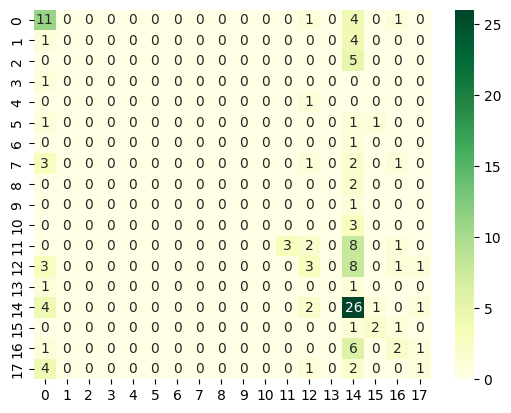

In [ ]:
#오차 행렬 시각화
cm = confusion_matrix(y_test, pred)
cm_matrix = pd.DataFrame(data=cm)


sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# LSTM 모델 구성
model_lstm = Sequential()
model_lstm.add(Dense(128, input_shape=(tfidf_matrix.shape[1],), activation='relu'))

#TF-IDF하면 2차원이니까 형태 바꾸기 위해서 reshape 사용
model_lstm.add(tf.keras.layers.Reshape((128, 1), input_shape=(128,)))
model_lstm.add(LSTM(128))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dense(24, activation='softmax'))

# 모델 컴파일
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 학습
model_lstm.fit(tfidf_matrix, fin_df['keyword2'], epochs=10, validation_split=0.5, batch_size=32, callbacks=[EarlyStopping(patience=10)])

# 예측
y_pred_lstm = model_lstm.predict(test_tfidf).argmax(axis=1)

# 평가
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
f1_lstm = f1_score(y_test, y_pred_lstm, average='weighted')

print(f'LSTM Accuracy: {accuracy_lstm}')
print(f'LSTM F1 Score: {f1_lstm}')

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 286ms/step - accuracy: 0.1749 - loss: 3.1103 - val_accuracy: 0.0000e+00 - val_loss: 3.1009
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 211ms/step - accuracy: 0.1774 - loss: 2.6700 - val_accuracy: 0.0000e+00 - val_loss: 3.1622
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 304ms/step - accuracy: 0.1590 - loss: 2.5138 - val_accuracy: 0.0000e+00 - val_loss: 2.9260
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 213ms/step - accuracy: 0.1881 - loss: 2.5385 - val_accuracy: 0.0000e+00 - val_loss: 3.0728
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 353ms/step - accuracy: 0.1784 - loss: 2.5242 - val_accuracy: 0.0000e+00 - val_loss: 3.0246
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 217ms/step - accuracy: 0.1874 - loss: 2.4877 - val_accuracy: 0.0000e+00 - val_loss: 3.0000
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 319ms/step - accuracy: 0.1973 - loss: 2.4550 - val_accuracy: 0.0000e+00 - val_loss: 2.8833
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 267ms/step - accuracy: 0.2078 - los

In [ ]:
# LSTM 모델 구성
model_lstm = Sequential()
model_lstm.add(Dense(128, input_shape=(tfidf_matrix.shape[1],), activation='relu'))

#TF-IDF하면 2차원이니까 형태 바꾸기 위해서 reshape 사용
model_lstm.add(tf.keras.layers.Reshape((128, 1), input_shape=(128,)))
model_lstm.add(LSTM(128))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dense(24, activation='softmax'))

# 모델 컴파일
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 학습
model_lstm.fit(tfidf_matrix, fin_df['keyword2'], epochs=10, validation_split=0.2, batch_size=32, callbacks=[EarlyStopping(patience=10)])

# 예측
y_pred_lstm = model_lstm.predict(test_tfidf).argmax(axis=1)

# 평가
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
f1_lstm = f1_score(y_test, y_pred_lstm, average='weighted')

print(f'LSTM Accuracy: {accuracy_lstm}')
print(f'LSTM F1 Score: {f1_lstm}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 280ms/step - accuracy: 0.1284 - loss: 3.0969 - val_accuracy: 0.0000e+00 - val_loss: 3.2727
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 199ms/step - accuracy: 0.1501 - loss: 2.6949 - val_accuracy: 0.0000e+00 - val_loss: 3.2972
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 246ms/step - accuracy: 0.1182 - loss: 2.6474 - val_accuracy: 0.0000e+00 - val_loss: 3.3099
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 242ms/step - accuracy: 0.1343 - loss: 2.6322 - val_accuracy: 0.0000e+00 - val_loss: 3.3271
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 183ms/step - accuracy: 0.1239 - loss: 2.5175 - val_accuracy: 0.1231 - val_loss: 2.8230
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 262ms/step - accuracy: 0.1595 - loss: 2.6430 - val_accuracy: 0.0038 - val_loss: 2.8758
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 200ms/step - accuracy: 0.1929 - loss: 2.2254 - val_accuracy: 0.0500 - val_loss: 2.7080
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - accuracy: 0.2948 - loss: 1.8903

4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step
LSTM Accuracy: 0.27611940298507465
LSTM F1 Score: 0.1824804548685146


In [ ]:
# LSTM 모델 구성
model_lstm = Sequential()
model_lstm.add(Dense(128, input_shape=(tfidf_matrix.shape[1],), activation='relu'))

#TF-IDF하면 2차원이니까 형태 바꾸기 위해서 reshape 사용
model_lstm.add(tf.keras.layers.Reshape((128, 1), input_shape=(128,)))
model_lstm.add(LSTM(128))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dense(24, activation='softmax'))

# 모델 컴파일
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 학습
model_lstm.fit(tfidf_matrix, fin_df['keyword2'], epochs=15, validation_split=0.2, batch_size=32, callbacks=[EarlyStopping(patience=10)])

# 예측
y_pred_lstm = model_lstm.predict(test_tfidf).argmax(axis=1)

# 평가
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
f1_lstm = f1_score(y_test, y_pred_lstm, average='weighted')

print(f'LSTM Accuracy: {accuracy_lstm}')
print(f'LSTM F1 Score: {f1_lstm}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 237ms/step - accuracy: 0.0953 - loss: 3.0491 - val_accuracy: 0.0000e+00 - val_loss: 3.4950
Epoch 2/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 176ms/step - accuracy: 0.1223 - loss: 2.5613 - val_accuracy: 0.0000e+00 - val_loss: 3.2583
Epoch 3/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 243ms/step - accuracy: 0.1586 - loss: 2.5688 - val_accuracy: 0.0000e+00 - val_loss: 3.3363
Epoch 4/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 175ms/step - accuracy: 0.1315 - loss: 2.4920 - val_accuracy: 0.0269 - val_loss: 2.8584
Epoch 5/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 212ms/step - accuracy: 0.1534 - loss: 2.2548 - val_accuracy: 0.1077 - val_loss: 2.7639
Epoch 6/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 172ms/step - accuracy: 0.2168 - loss: 2.0714 - val_accuracy: 0.1538 - val_loss: 2.3758
Epoch 7/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - accuracy: 0.2857 - loss: 1.7801 - val_accuracy: 0.1154 - val_loss: 2.4317
Epoch 8/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 256ms/step - accuracy: 0.3361 - loss: 1.6556 - v

In [ ]:
# LSTM 모델 구성
model_lstm = Sequential()
model_lstm.add(Dense(128, input_shape=(tfidf_matrix.shape[1],), activation='relu'))

#TF-IDF하면 2차원이니까 형태 바꾸기 위해서 reshape 사용
model_lstm.add(tf.keras.layers.Reshape((128, 1), input_shape=(128,)))
model_lstm.add(LSTM(128))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dense(24, activation='softmax'))

# 모델 컴파일
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 학습
model_lstm.fit(tfidf_matrix, fin_df['keyword2'], epochs=15, validation_split=0.2, batch_size=16, callbacks=[EarlyStopping(patience=10)])

# 예측
y_pred_lstm = model_lstm.predict(test_tfidf).argmax(axis=1)

# 평가
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
f1_lstm = f1_score(y_test, y_pred_lstm, average='weighted')

print(f'LSTM Accuracy: {accuracy_lstm}')
print(f'LSTM F1 Score: {f1_lstm}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 150ms/step - accuracy: 0.1089 - loss: 2.9562 - val_accuracy: 0.0000e+00 - val_loss: 3.3638
Epoch 2/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.1348 - loss: 2.6450 - val_accuracy: 0.0000e+00 - val_loss: 3.2224
Epoch 3/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - accuracy: 0.1480 - loss: 2.5563 - val_accuracy: 0.0000e+00 - val_loss: 2.8843
Epoch 4/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.1550 - loss: 2.3072 - val_accuracy: 0.1308 - val_loss: 2.5668
Epoch 5/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 137ms/step - accuracy: 0.1982 - loss: 2.1466 - val_accuracy: 0.1038 - val_loss: 2.4821
Epoch 6/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - accuracy: 0.2119 - loss: 1.9979 - val_accuracy: 0.2538 - val_loss: 2.2381
Epoch 7/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - accuracy: 0.3266 - loss: 1.7563 - val_accuracy: 0.3000 - val_loss: 2.2145
Epoch 8/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.4579 - loss: 1.4628 - v